# Google Play Apps and Reviews

Se examinan los archivos disponibles:
apps.csv, user_reviews.csv.
El primero contiene todos los detalles de las aplicaciones de Google Play, hay 13 caraterísticas que describen una app dada. En el segundo archivo hay 100 observaciones para cada app, el texto en cada observación ha sido pre-procesada y atribuida con tres nuevas características: Sentiment (Positive, Negatice, Neutral), Sentiment Polarity and Sentiment Subjetivity.

In [8]:
import pandas as pd
apps_with_duplicates = pd.read_csv('processed-android/apps.csv')

# Borrar duplicados de apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Mostrar el número total de apps
print('Número total de apps en el dataset = ',apps.count())

# Mirar los primeros cinco registros
print(apps.head())

Número total de apps en el dataset =  Unnamed: 0        9659
App               9659
Category          9659
Rating            8196
Reviews           9659
Size              8432
Installs          9659
Type              9659
Price             9659
Content Rating    9659
Genres            9659
Last Updated      9659
Current Ver       9651
Android Ver       9657
dtype: int64
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_

## Limpieza de Datos


El código anterior se observaron registros de una muestra aleatoria del dataset, se puede observar que en algunas entradas como Installs and Price tienen caracteres especiales (+, $) debido a la naturaleza de lo que representan los números. Esto resulta en que las columnas no guardan números puramente, lo que dificulta usarlos para futuros cálculos matemáticos.

Procedemos a limpiar los datos, específiamente, los caracteres * y $ presentes en las columnas Installs, Price tienen que ser removidos.

In [9]:
# Lista de caracteres a remover
char_to_remove = ['+',',','$']

# Lista de los nombres de las columnas a limpiar
cols_to_clean = ['Installs','Price']

# Loop para cada  columa en cols_to_clean
for col in cols_to_clean:
    # Loop para cada caracter en char_to_remove
    for char in char_to_remove:
        # Reemplazar el caracter con un string vacío
        apps[col] = apps[col].apply(lambda x:x.replace(char,'')) 
        
# Mostrar información del DataFrame apps
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB


## Corregir el tipo de dato
La información para las columnas Installs y Price muestra que fueron categorizados con el tipo de dato object, esto debido a que originalmente las dos columnas tenían múltiples tipos de datos: dígitos y caracteres especiales. Sin embargo, lo que se quiere es que sea Int o Float, ya que serán de las columnas con  las que mayormente se trabajará. A continuación se convierte el tipo de dato de estas columnas como númericos.

In [10]:
import numpy as np

# Conversion de Installs como float
apps['Installs'] = apps['Installs'].astype('float')

# Conversion de Price como float
apps['Price'] = apps['Price'].astype('float')

# Revisar el nuevo tipo de dato
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB


## Exploración de las Categorias de las Apps
Con el objetivo de mejorar los motores de búsqueda, Google agrupa las apps por categorias. Nos centramos en las siguientes preguntas:
¿Qué categoria tiene la mayor proporción de aplicaciones activas en el mercado?,
¿Hay alguna categoría en específico que domine el mercado?,
¿Cuáles categorias tienen el menor número de apps?
A continuación se verán las categorias presentes en nuestro dataset, además cuáles son las más dominantes.

In [11]:
import plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go 

# Se muestra el número total de categorias únicas
num_categories = len(apps['Category'].unique())
print('Número de categorias', num_categories)

# Cuenta el número de aplicaciones en cada categoria
num_apps_in_category = apps['Category'].value_counts()

# Se ordena num_apps_in_category en orden desendiente basado en la cuenta de apps en cada categoria
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = nombre de la categoria
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Número de categorias 33


## Distribución de las calificaciones de las apps
Después de haber visto las cuotas del mercado de cada categoría de aplicaciones, veamos cómo se comportan todas estas aplicaciones en promedio. Las calificaciones de las aplicaciones afectan la capacidad de descubrimiento, la conversión de las aplicaciones y la imagen de marca general de la empresa. Las calificaciones son un indicador clave del rendimiento de una aplicación.

A partir de nuestra investigación encontramos que el volúmen promedio de calificaciones en todas las categorias de aplicaciones es 4.17. El gráfico de histograma está sesgado hacia la izquierda, lo que indica que la mayoría de las aplicaciones tienen calificaciones altas, con solo unas pocas excepciones en las aplicaciones con calificaciones bajas.

In [12]:
# Promedio de calificaciones de las apps
avg_app_rating = apps['Rating'].mean()

# Distribución de las aplicaciones de acuerdo a sus calificaciones
data = [go.Histogram(
        x = apps['Rating']
)]

# Línea vertical que indica el promedio de las calificaciones de ls apps
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

## Tamaño y precio de una app
A continuación se examina el tamaño y precio de las aplicaciones. Para el tamaño, si la aplicación de muy pesada sería difícil para los usuarios el descargarla, lo que resultaría en un abandono de la app antes de experimentarla. Además cada usuario tiene un espacio de memoria limitado. Para el precio, algunos usuarios esperan que las aplicaciones sean gratis o baratas.

### ¿Cómo podemos efectuar estrategias efectivas para el precio y tamaño de nuestra app?
Afecta el tamaño de la app en su calificación?
Los usuarios realmente se preocupan sobre las aplicaciones con sistemas pesados o prefieren las ligeras?
El precionde la app afecta en su calificación?
Los usuarios prefieren apps gratis o pagadas?

Encontramos que las mayoría de las calificaciones altas de las apps (califiación sobre 4) se encuentran entre 2 MB y 20 MB. También se encontró que la vasta mayoría de apps tienen precios por debajo de $10.

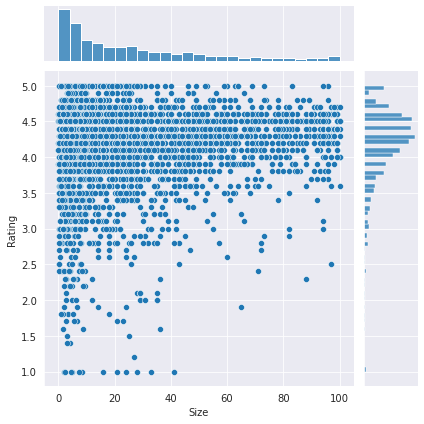

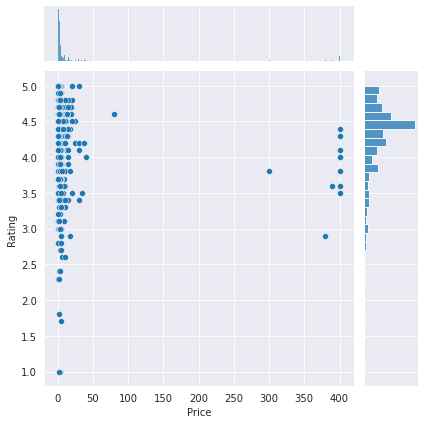

In [15]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
 
# Se seleccionan las filan en donde ambos valores de 'Rating' y 'Size' están presentes (es decir, que no son nulos)
apps_with_size_and_rating_present = apps.dropna(subset=['Rating','Size'])

# Subconjunto para categorias con al menos 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >=250)

# Gráfica size versus rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Selección de apps cuyos campo 'Type' es 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type']=='Paid']

# Grafica precio vs calificación
plt2 = sns.jointplot(x= paid_apps['Price'], y = paid_apps['Rating'])

## Relación entre categoria y precio
